**Цель работы:**

Изучить связи между признаками двумерного набора данных, визуализация данных.

# Загрузка набора данных

### Описание предметной области

Вариант №7

Набор данных: salary2.csv

Атрибуты:
1. Год выплаты заработной платы (целое число)
2. Тип работы (PT - Part-time, FT - Full-time, FL-Freelance)
3. Должность
4. Зарплата за год (целое число)
5. Зарплата в долларах (целое число)
6. Страна проживания
7. Страна главного офиса
8. Среднее кол-во людей в компании (S - менее 50
сотрудников (малая), M от 50 до 250 сотрудников (средняя), L - более 250
сотрудников (крупная))
9. Общий опыт работы
10. Опыт на последней работе

### 1.Чтение файла (набора данных)

1.1 Загрузить датасет с помощью библиотеки pandas.

In [ ]:
import pandas as pd
path = 'C:/Users/Алиса/Desktop/ГУАП/3 курс/1 семестр/Введение в анализ данных/Лабораторная работа №2/salary2.csv'
df = pd.read_csv(path, sep=';')

1.2 Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,exp_all,exp
count,401.000000,3.980000e+02,401.000000,401.000000,401.000000
mean,2021.528678,2.888336e+05,105895.017456,17.197007,4.486284
std,0.678086,1.677081e+06,58183.664171,11.133445,2.027421
min,2020.000000,4.000000e+03,2859.000000,0.000000,-1.000000
25%,2021.000000,6.700000e+04,65013.000000,10.000000,3.000000
50%,2022.000000,1.091400e+05,100000.000000,15.000000,4.000000
75%,2022.000000,1.500000e+05,140000.000000,22.000000,6.000000
max,2022.000000,3.040000e+07,412000.000000,81.000000,10.000000


1.3 Выполнение предварительной обработки данных

1.3.1 Проверка наличия пропусков, а также названия столбцов

In [5]:
for column in df.columns:
    print(f'{column} : {df[column].isna().sum()}')

work_year : 0
employment_type : 0
job_title : 0
salary : 3
salary_in_usd : 0
employee_residence : 0
company_location : 0
company_size : 0
exp_all : 0
exp : 0


1.3.2 Заполнение пропусков

In [6]:
for column in df.columns:
    if column == 'salary':
        df[column] = df[column].fillna(df[column].median())
for column in df.columns:
    print(f'{column} : {df[column].isna().sum()}')

work_year : 0
employment_type : 0
job_title : 0
salary : 0
salary_in_usd : 0
employee_residence : 0
company_location : 0
company_size : 0
exp_all : 0
exp : 0


1.3.3 Проверка явных и неявных дубликатов

In [7]:
df[df.duplicated()] # получение дубликатов с помощью логической индексации
print(df.duplicated().sum())

0


In [8]:
for column in df.columns:
    if column in ['employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
        df[column] = df[column].str.upper()
        print(f'{column}: {df[column].unique()}')

employment_type: ['FT' 'PT' 'FL']
job_title: ['DATA SCIENTIST' 'PRODUCT DATA ANALYST' 'DATA ANALYST' 'DATA ENGINEER'
 'MACHINE LEARNING MANAGER' 'DATA ANALYTICS ENGINEER'
 'DATA SCIENCE ENGINEER' 'MACHINE LEARNING DEVELOPER'
 'DATA ANALYTICS MANAGER' 'HEAD OF DATA SCIENCE'
 'HEAD OF MACHINE LEARNING' 'NLP ENGINEER' 'DATA ANALYTICS LEAD'
 'DATASCIENTIST' 'DATA ANALYTICSMANAGER']
employee_residence: ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'PH'
 'GB' 'ES' 'IT' 'PL' 'BG' 'NL' 'IQ' 'UA' 'SG' 'RU' 'MT' 'CL' 'RO' 'IR'
 'VN' 'BR' 'HK' 'TR' 'RS' 'AR' 'DZ' 'AU' 'CH']
company_location: ['DE' 'HN' 'US' 'HU' 'FR' 'IN' 'PK' 'JP' 'GR' 'MX' 'CA' 'AT' 'NG' 'GB'
 'ES' 'IT' 'LU' 'PL' 'NL' 'IQ' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'BR' 'VN'
 'TR' 'DZ' 'MY' 'AU' 'CH']
company_size: ['L' 'S' 'M' 'LARGE']


In [9]:
df['job_title'] = df['job_title'].replace('DATASCIENTIST', 'DATA SCIENTIST')
df['company_size'] = df['company_size'].replace('LARGE', 'L')
df['job_title'] = df['job_title'].replace('DATA ANALYTICSMANAGER', 'DATA ANALYTICS MANAGER')

1.3.4 Приведение к необходимым типам данных

In [10]:
df.dtypes

work_year             float64
employment_type        object
job_title              object
salary                float64
salary_in_usd         float64
employee_residence     object
company_location       object
company_size           object
exp_all                 int64
exp                     int64
dtype: object

In [11]:
for column in df.columns:
    if column in ['work_year', 'salary', 'salary_in_usd']:
        df[column] = df[column].astype(int)

### 2. Построение точечной диаграммы (матрицы диаграмм рассеяния) для всех признаков.

2.1 Построение матрицы диаграмм рассеяния для всех признаков.

array([[<Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='salary', ylabel='work_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='work_year'>,
        <Axes: xlabel='exp_all', ylabel='work_year'>,
        <Axes: xlabel='exp', ylabel='work_year'>],
       [<Axes: xlabel='work_year', ylabel='salary'>,
        <Axes: xlabel='salary', ylabel='salary'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary'>,
        <Axes: xlabel='exp_all', ylabel='salary'>,
        <Axes: xlabel='exp', ylabel='salary'>],
       [<Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp_all', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp', ylabel='salary_in_usd'>],
       [<Axes: xlabel='work_year', ylabel='exp_all'>,
        <Axes: xlabel='salary', ylabel='exp_all'>,
        <Axes: xlabel='salary_in_usd', ylabel='exp_all'>,
        <A

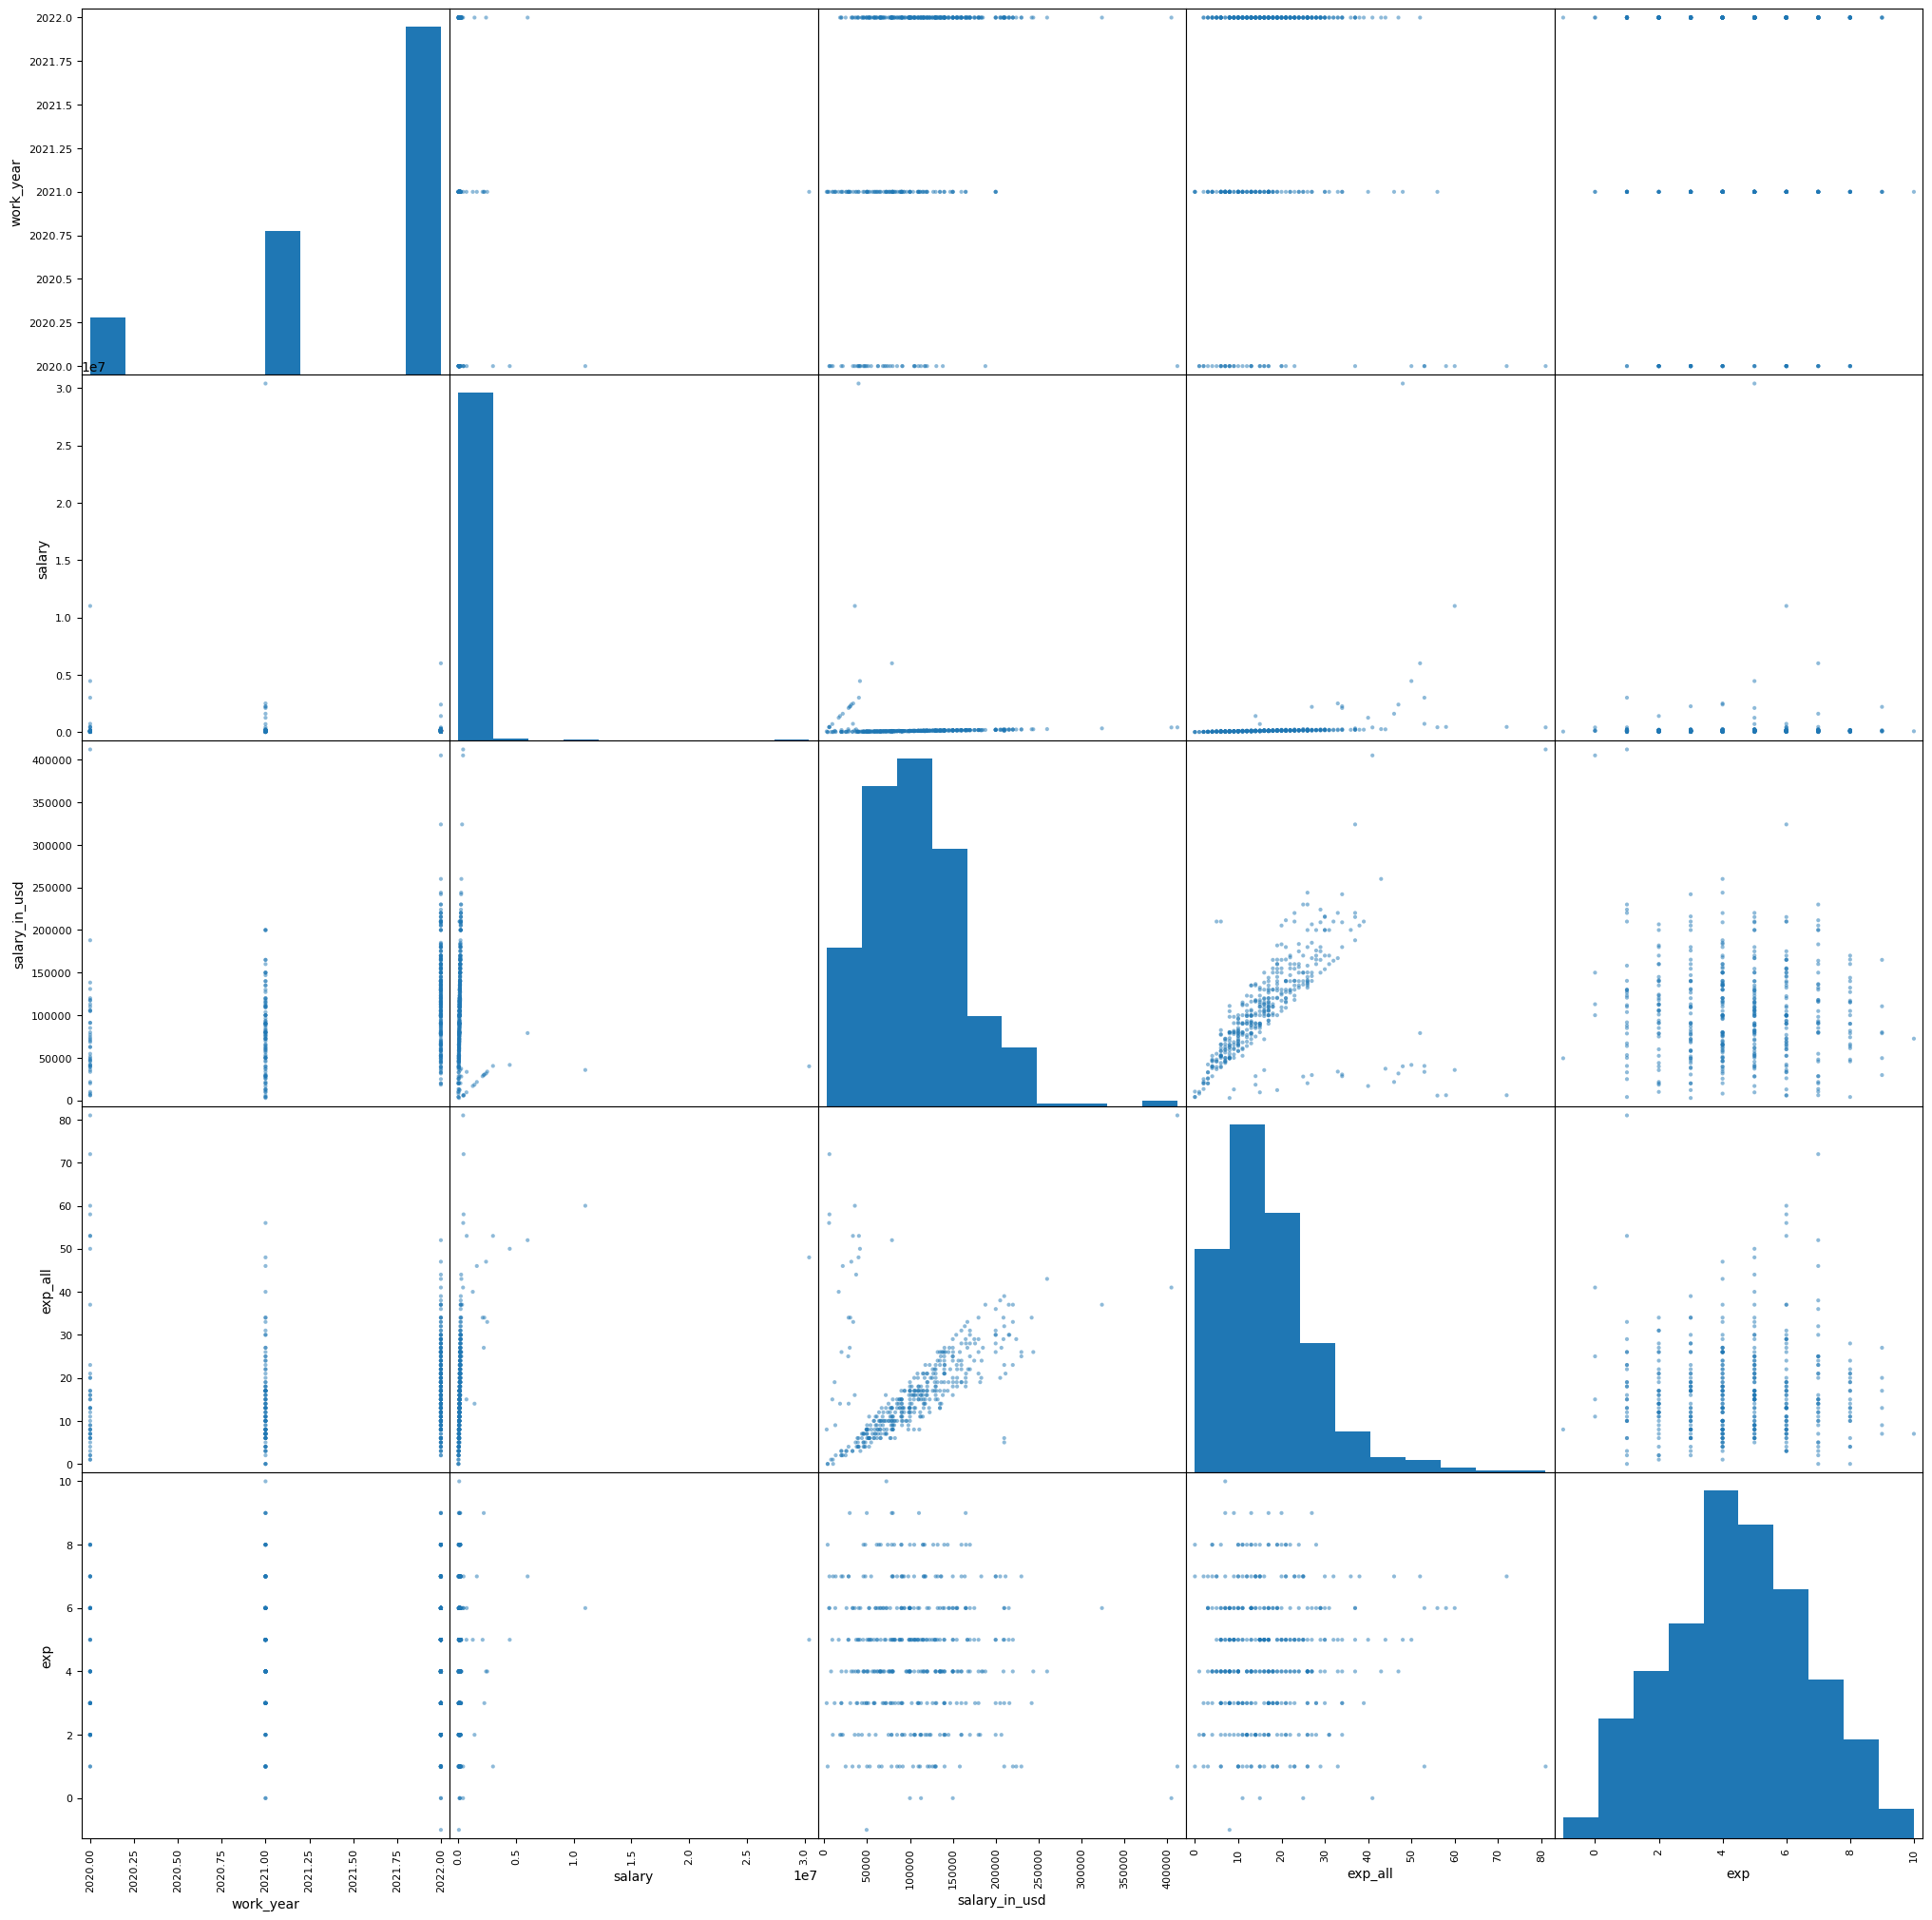

In [12]:
pd.plotting.scatter_matrix(df, figsize=(25, 25)) # использование pandas


2.2 Выполнение анализа полученной диаграммы. Изучение параметров и описание взаимосвязей.

В результате было получено 25 диаграмм, из которых сделали следующие выводы:
1. Данная диаграмма демонстрирует распределение параметров, как и другие диаграммы, расположенные по диагонали
2. Work_year - salary. Данная диаграмма показывает, что в 2021 году была зафиксирована наибольшая заработная плата. Также можно посмотреть распределение зарплат в течение каждого года, с Work_year - salary_in_usd, а также salary - Work_year и salary_in_usd - Work_year аналогичная ситуация.
3. Work_year - exp_all. Аналогично с exp_all - Work_year. Показывает зависимость между годом выплаты зп и опытом в общем. Можно сказать, что максимальный опыт у сотрудника, получившего зп в 2020 году, аналогичная ситуация и с Work_year - exp и exp - Work_year, но там уже максимальный опыт у сотрудника, получившего зп в 2021 году.
4. salary - salary_in_usd. Зависимость зп ти зп в долларах. Здесь можно увидеть небольшую линейную зависимость, но она не для всех будет характерна, аналогичная ситуация и для salary_in_usd - salary.
5. salary - exp_all. Здесь показана зависимость опыта целиком от зарплаты. И можно сказать, что как таковой зависимости нет, и при достижении определенного стажа зп начинает расти, аналогично и диаграмма exp_all - salary.
6. salary - exp. Здесь показана зависимость опыта от зарплаты. Также можно сказать, что максимальная зп у сотрудника с опытом в 6 лет. Аналогично для exp - salary.
7. salary_in_usd - exp_all. И можно увидеть линейную зависимость, когда при увеличении опыта, увеличивается и зп в долларах. Аналогично для exp_all - salary_in_usd.
8. salary_in_usd - exp. Аналогично с exp - salary_in_usd. Зависимость зп в долларах от опыта. Зависимости как таковой нет, можно увидеть, что наибольшая зп у сотрудника со стажем также в 6 лет.
9. exp_all - exp. Аналогично с exp - exp_all.Показана связь опыта в целом от опыта в компании. Можно увидеть, что есть сотрудники, работавшие 10 лет только в этой компании.

2.3  Минимум один график (диаграмму рассеивания) сделать по категориям. Показать зависимость зарплаты и опыта работы по каждой должности. Различные должности должны быть показаны разными цветами.

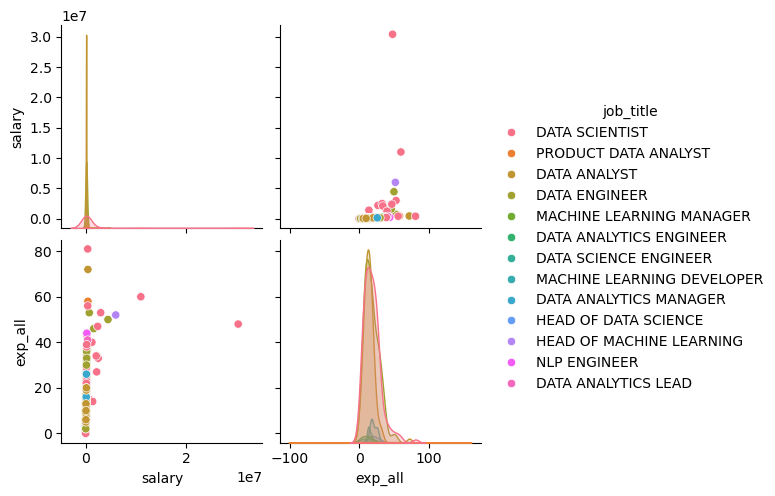

In [13]:
import seaborn as sns
sns.pairplot(df[['salary','exp_all', 'job_title']], hue = 'job_title')

Выводы по диаграмме рассеивания по категориям.
1. Наиболее высокая зп по должности data scientist, также как и наибольший опыт работы в целом.
2. На данной диаграмме можно увидеть распределение зп, а также опыта в целом по конкретным специальностям работы.

### 3. Гистограммы для каждого числового признака


3.1 Построить гистограммы для каждого числового признака, подобрать оптимальное количество bins.

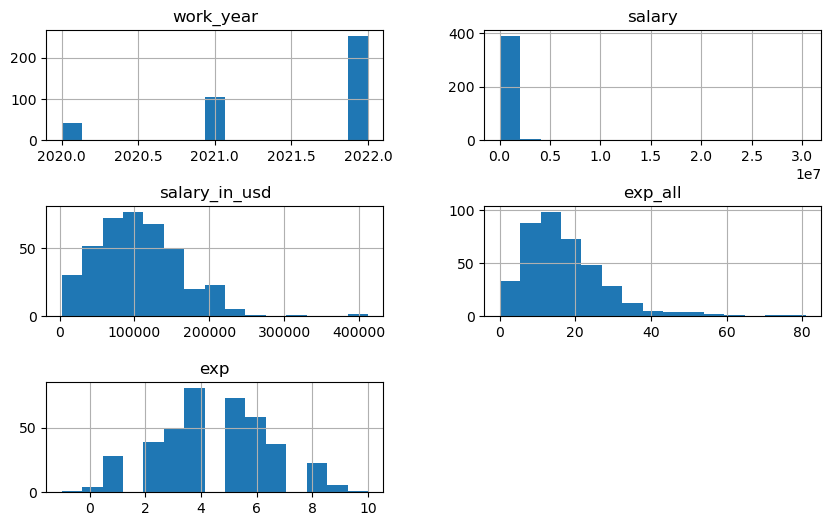

In [70]:
import matplotlib.pyplot as plt
df.hist(bins=15, figsize=(10,6))
plt.subplots_adjust(hspace=0.6)
plt.show()

По данным гистограммам можно сделать следующие выводы:
1. Больше 200 записей, о том, что зп выдана 2022 году, около 100 о выдаче в 2021 и около 50 о выдаче в 2020.
2. ЗП была всегда почти минимальной.
3. ЗП в долларах наиболее часто встречаемая сумма - 100000.
4. Самый часто встречаемый опыт в целом - 15 лет.
5. А самый часто встречаемый опыт в компании - 4 года.


### 4. Исследование взаимосвязи между переменными с помощью оценки коэффициента корреляции и ковариации

4.1 Нахождение корреляции и ковариации

In [15]:
df[['work_year', 'salary', 'salary_in_usd', 'exp_all', 'exp']].corr()

,work_year,salary,salary_in_usd,exp_all,exp
work_year,1.000000,-0.096426,0.333551,0.030212,-0.011079
salary,-0.096426,1.000000,-0.092159,0.317241,0.033726
salary_in_usd,0.333551,-0.092159,1.000000,0.495942,-0.076138
exp_all,0.030212,0.317241,0.495942,1.000000,0.009922
exp,-0.011079,0.033726,-0.076138,0.009922,1.000000


In [16]:
df[['work_year', 'salary', 'salary_in_usd', 'exp_all', 'exp']].cov()

,work_year,salary,salary_in_usd,exp_all,exp
work_year,0.459800,-1.092491e+05,1.315978e+04,2.280860e-01,-0.015231
salary,-109249.076278,2.791747e+12,-8.959329e+09,5.901415e+06,114247.252350
salary_in_usd,13159.775748,-8.959329e+09,3.385339e+09,3.212636e+05,-8981.486010
exp_all,0.228086,5.901415e+06,3.212636e+05,1.239536e+02,0.223959
exp,-0.015231,1.142473e+05,-8.981486e+03,2.239589e-01,4.110436


4.2 Построение heatmap (тепловой карты корреляции).

<Axes: >

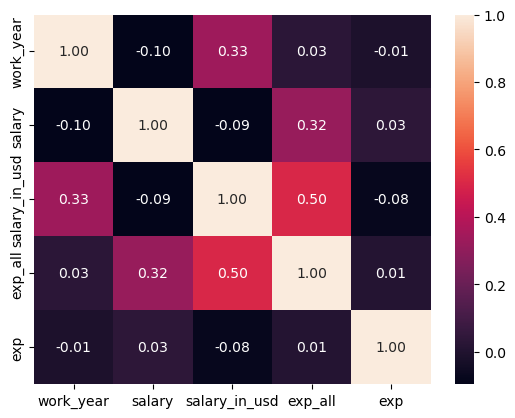

In [25]:
sns.heatmap(df[['work_year', 'salary', 'salary_in_usd', 'exp_all', 'exp']].corr(), annot=True, fmt=".2f")

Выводы
1. work_year-salary. Так как значение отрицательное и равно -0,10, то линейная связь практически отсутвует. 
2. work_year-salary_in_usd. Есть небольшая линейная связь, так как значение больше 0.
3. work_year-exp_all. Отсутвие линейной связи.
4. work_year-exp. Также значение отрицательное и небольшое. Поэтому линейная практически связь отсутсвует.
5. salary-salary_in_usd. Также значение отрицательное и небольшое. Поэтому линейная связь практически отсутсвует. Можно предположить, что зп указана в разных валютах, в следствии одного перевода в доллары выполнено не может быть.
6. salary-exp_all. Небольшая линейная связь присутсвует.
7. salary-exp. Отсутвие линейной связи.
8. salary_in_usd-exp_all. Значение больше 1. Небольшая линейная связь присутвует.
9. salary_in_usd-exp. Так как значение отрицательное, то линейная связь практически отсутвует. 
10. exp_all-exp. Отсутвие линейной связи, так как значение приближено к 0.

### 5. Построение графиков

#### Задание 1

*`Использовать seaborn. По группировке - work_year и количество компаний по различному типу занятости (employment_type) построить диаграмму.`*

   work_year employment_type  count
0       2020              FT     41
1       2020              PT      1
2       2021              FL      1
3       2021              FT    102
4       2021              PT      2
5       2022              FL      1
6       2022              FT    251
7       2022              PT      2


<Axes: xlabel='work_year', ylabel='count'>

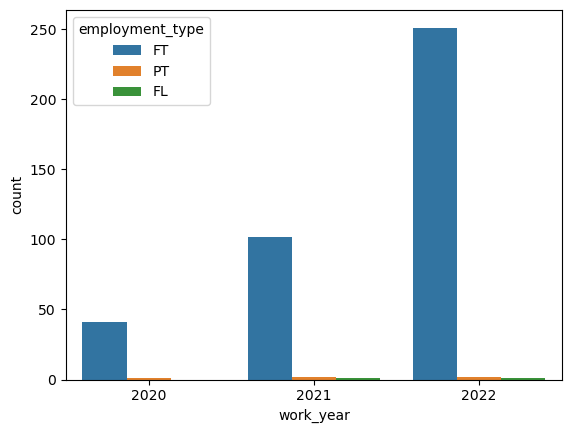

In [38]:
grouped = df.groupby(['work_year', 'employment_type'])['employment_type'].count().reset_index(name='count')
print(grouped)
sns.barplot(grouped, x="work_year", y="count", hue='employment_type')

По данному графику можно сделать вывод, что больше всего работают сотрудники в полный рабочий день. Меньше всего на фрилансе.

#### Задание 2

*`Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по локациям (company_location). Сделать линию зелёной, шириной 4 и отобразить маркеры.`*

<Axes: xlabel='company_location'>

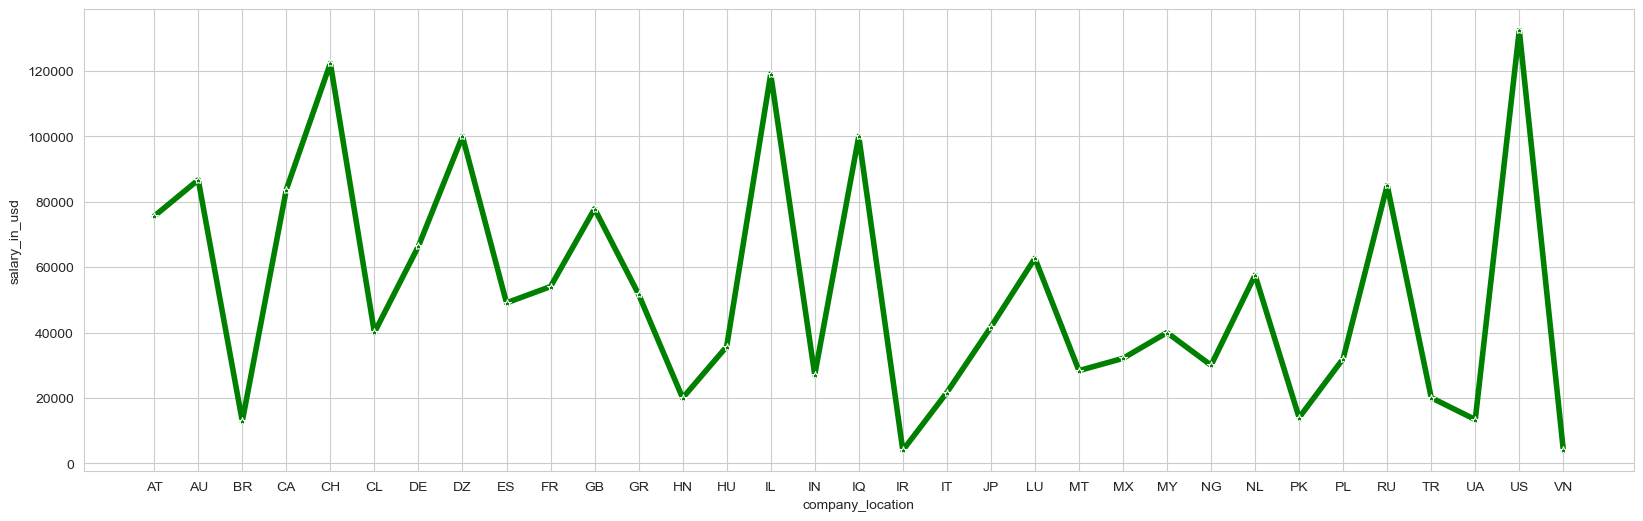

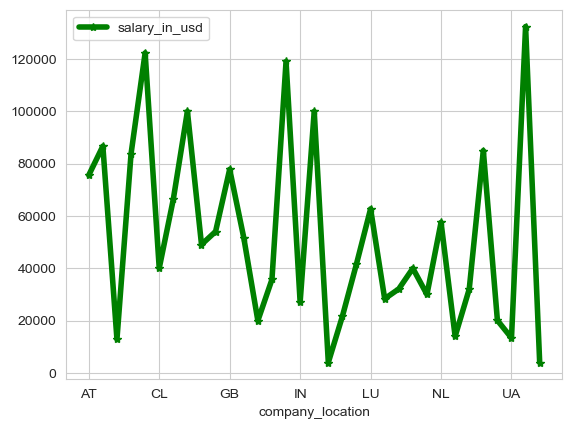

In [129]:
pvt_table = df.pivot_table(index='company_location', values ='salary_in_usd', aggfunc='mean').round(3)
plt.figure(figsize=(20,6))
sns.lineplot(pvt_table, x='company_location', y='salary_in_usd', marker='*', linewidth=4, color='green')
pvt_table.plot(linewidth=4, color='g', marker='*')


Из данной диаграммы можно увидеть зависимость расположения компании от зп в долларах, а также можно сделать следующие выводы:
1. Самая высокая зп в долларах в США, а самая низкая в таких странах как Вьетнам и Ирак.
2. Самая средняя зп в долларах в Люксембурге и в Нидерландах.

#### Задание 3

*`Использовать matplotlib. Построить круговую диаграмму, которая отображает процент количества записей по каждому году.`*

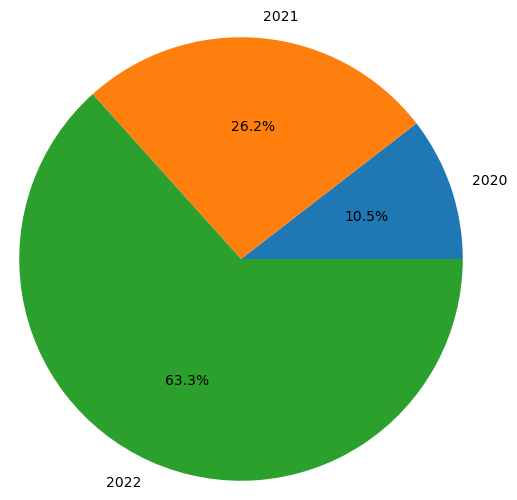

In [89]:
plt.figure(figsize=(6,6))
grpby = df.groupby('work_year')['work_year'].count().reset_index(name='count')
values = grpby['count'] # числовые значения
labels = grpby['work_year']  # подписи с названиями категорий
plt.pie(values, labels=labels, autopct="%.1f%%", radius=1.2)
plt.show()


В результате данной круговой диаграммы можно увидеть, что больше всего записей было в 2022, меньше всего - 2020.

### 6. График типа hexagonal binning plot

<Axes: xlabel='exp_all', ylabel='salary_in_usd'>

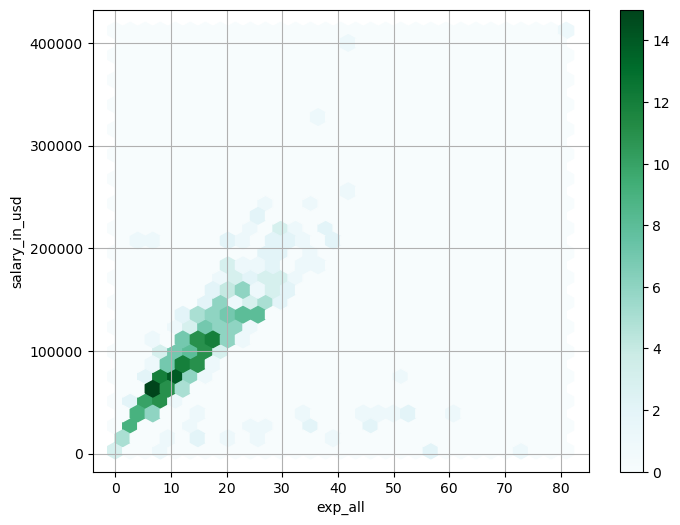

In [93]:
df.plot(x='exp_all', y='salary_in_usd', kind='hexbin', gridsize=30, figsize=(8, 6), sharex=False, grid=True)

Данная диаграмма показывает зависимость и частоту записей зависимости зп в долларах от опыта в целом. Можно увидеть линейную зависимость, а также больше всего записей в пересечении 5 лет опыта и зп до 100000 долларов. Также можно сказать, что зп в долларах тем больше, чем больше опыт.

### 7. Boxplot

7.1 Минимум один график типа boxplot для любого столбца.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c41b0f5810>,
 'caps': [<matplotlib.lines.Line2D at 0x1c41b0f5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c41b0f56d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c41b0f5d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c41b0f5e50>],
 'means': []}

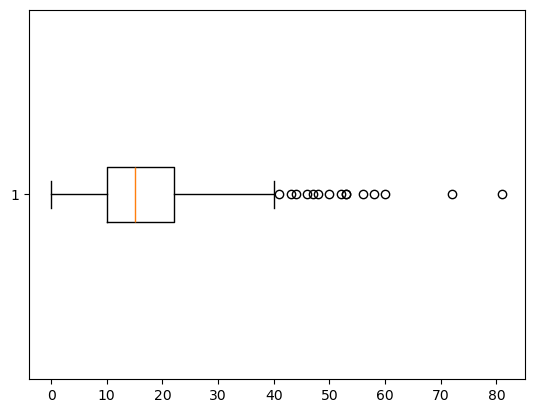

In [ ]:
plt.boxplot(df['exp_all'], vert = False)

Оранджевая линия - это 50-й процентиль. Ящик - это от 25 процентиля до 75. Показывает разброс стандартных данных. Усы - это предел нормального диапазона. Именно поэтому разделение опыта происход в отметке около 15 лет. Нормальным опытом считается опыт от 0 до 40, а все, что больше это выбросы.

7.2 Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).


7.2.1 Добавьте категорию по любому числовому столбцу.

In [99]:
df['salary_category'] = pd.qcut(df['salary'], q=3, labels=['SMALL', 'MEDIUM', 'LARGE'])


7.2.2 Сделайте boxplot по этому числовому столбцу по каждой
новой категории.

<Axes: title={'center': 'salary'}, xlabel='salary_category'>

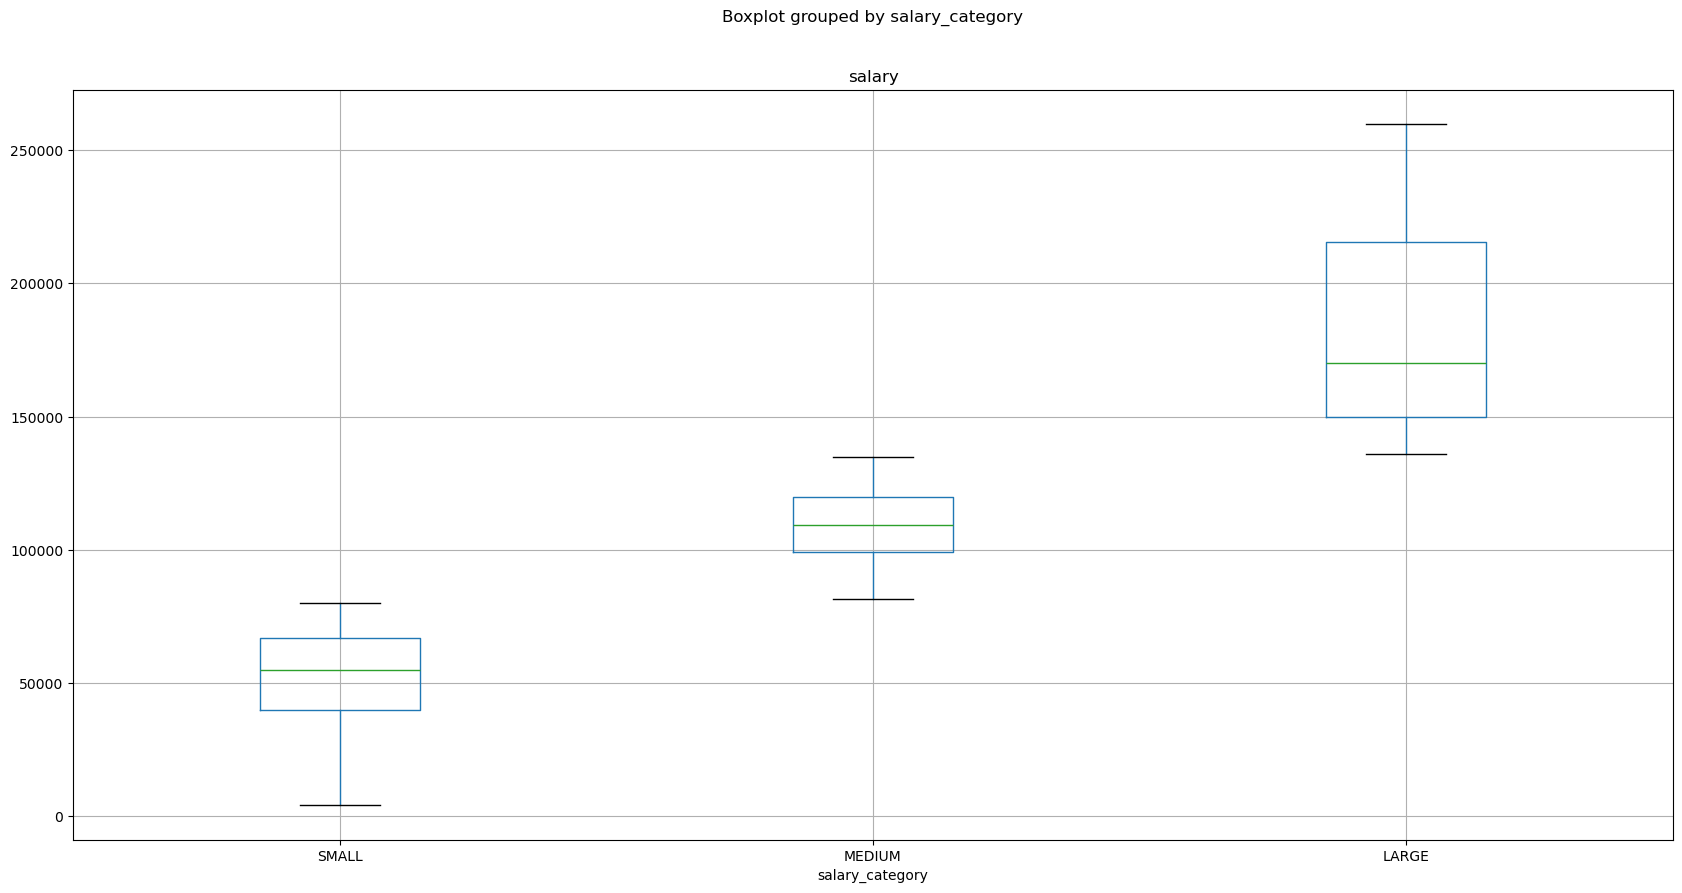

In [104]:
df.boxplot(column='salary', by='salary_category', showfliers=False, figsize=(20,10))

7.3 Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для
каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2).

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

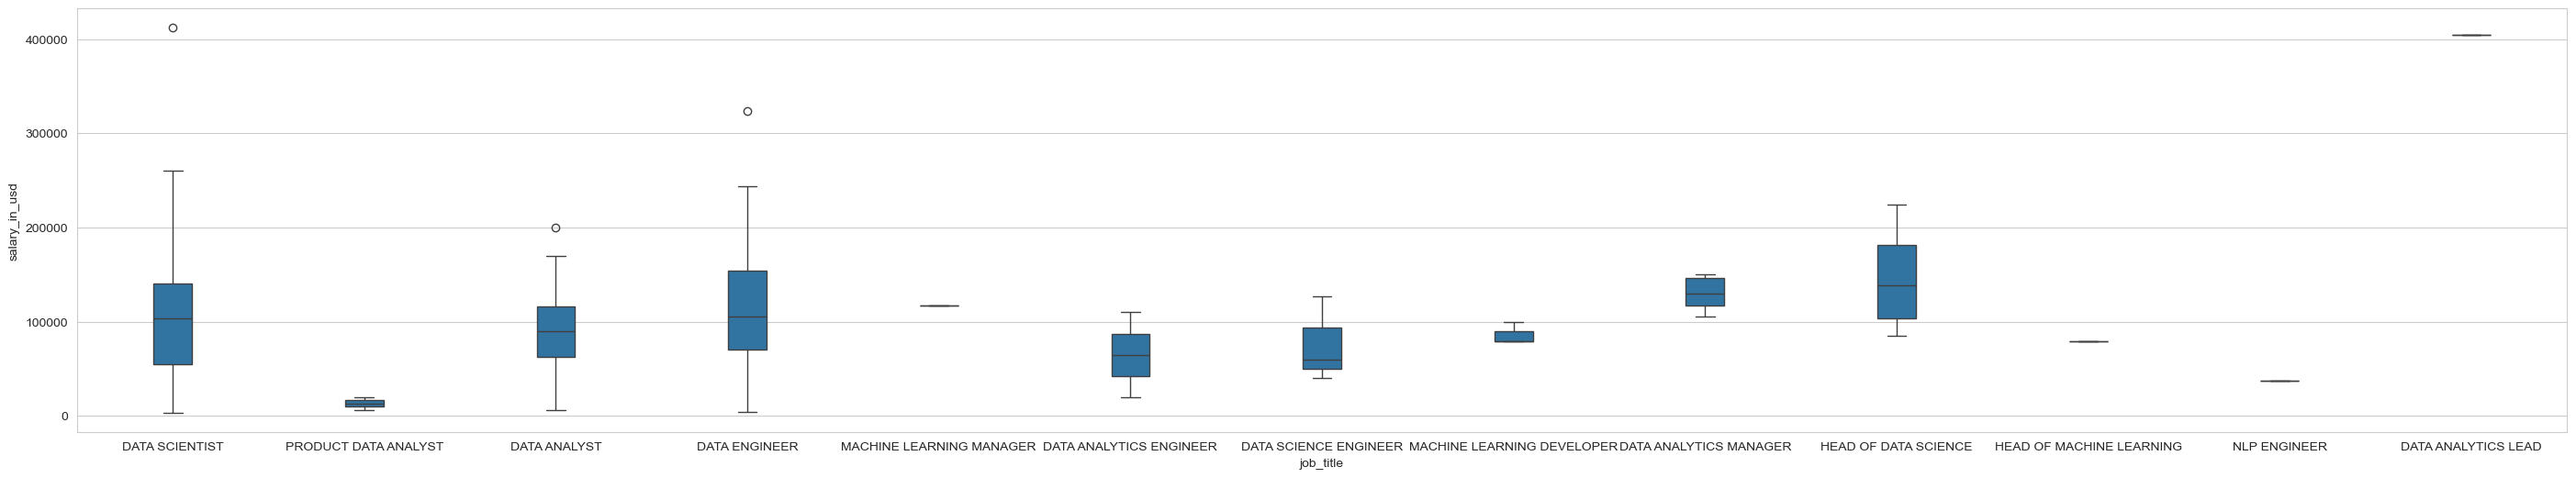

In [124]:
plt.figure(figsize=(35,6))
sns.set_style("whitegrid") # стиль для отображения графиков
sns.boxplot(x = df['job_title'], y = df['salary_in_usd'], width = 0.2) # диаграмма по каждой категории столбца fueltype (y - числовой, x - категориальный)

<Axes: title={'center': 'salary'}, xlabel='employment_type'>

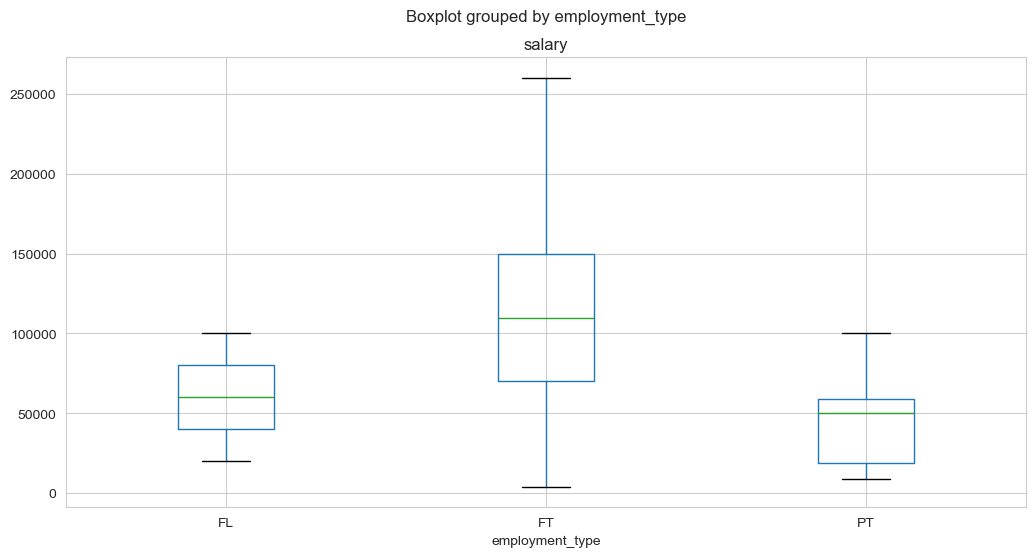

In [127]:
df.boxplot(column='salary', by='employment_type', showfliers=False, figsize=(12,6))


Благодаря данным диаграммам можно посмотреть средний диапазон зп в долларах по каждой профессии. Из чего также можно сделать вывод, что наибольшая средняя зп в долларах у head of data science.
Также построили диграмму для просмотра средней зп по типу работы. Из чего также сделали вывод, что наибольшая средняя зп у сотрудников, работающих полный рабочий день.

### Вывод


В результате выполнения данной лабораторной работы произвели анализ набора данных по зарплатам сотрудников. Повторили предобработку данных методами, изученными в первой лабораторной работе, научились строить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков, а также диаграмму рассеивания по одной категории, также научились работать с аргументами функции для создания точечных диаграмм. Научились строить гистограммы для каждого числового признака, а также подбирать оптимальное количество bins. Также изучили корреляцию и ковариацию и научились строить тепловую карту корреляции, а также делать выводы по ней. Также были изучены и построены следующие типы графиков, а именно график типа hexagonal binning plot, график типа boxplot. Также повторили создание новых категорий. А также было выполнено индивидуальное задание по варианту и сделаны следующие выводы:
1. Была построена гистограмма и по ней сделан вывод, что больше всего работают сотрудники в полный рабочий день. Меньше всего на фрилансе.
2. Была построена диаграмма зависимости страны компании и зп в долларах. А также сделаны следующие выводы: 1. Самая высокая зп в долларах в США, а самая низкая в таких странах как Вьетнам и Ирак. 2. Самая средняя зп в долларах в Люксембурге и в Нидерландах.
3. Была построена и изучена круговая диаграмма. В результате сделали вывод, что больше всего записей было в 2022, меньше всего - 2020.

### Дополнительное задание

**`Подробная формулировка задания`**

In [ ]:
# код выполнения задания

***`Подробный вывод по заданию, описание полученных результатов`***